## ADA final exam (Fall 2022)

This exam consists of 3 tasks. Tasks 2 and 3 are independent of each other (although conceptually related).


## Dataset

For a Wikipedia editor to become an administrator, a so-called “request for adminship” ([RfA](https://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship)) must be submitted by either the candidate or another community member. Subsequently, any Wikipedia member may cast a supporting or opposing vote. Here we provide a simplified version of the Wikipedia RfA dataset, containing all votes from 2003 through 2012.

###  Data format

|        |   SRC |   TGT |   VOT |   RES |   YEA | DAT                 | TXT                                                                                                                                                                                               |
|-------:|------:|------:|------:|------:|------:|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  39054 |  3444 | 10170 |     1 |     1 |  2009 | 2009-07-01 17:50:00 | '''Support''' - Best of luck. &nbsp;                                                                                                                                                              |
| 159680 |   722 |  9634 |    -1 |    -1 |  2006 | 2006-12-15 07:28:00 | '''Oppose''' Not even 2000 edits.                                                                                                                                                                 |
| 173438 |  4194 |  5524 |     1 |     1 |  2005 | 2005-03-18 19:22:00 | Ohhh, you're Carrp!  In that case, '''Support'''.                                                                                                                                                 |
|  60627 |  4855 |  9436 |     1 |     1 |  2008 | 2008-12-18 23:26:00 | '''Support''' via thoughtful answer to my question that demonstrates this editor has clue.                                                 |
| 194809 |  7687 |   908 |     1 |     1 |  2004 | 2004-09-25 05:21:00 | Nicholas is very good in English. Also, he got '''exceptional''' patience to explain petty obvious facts in talk page to convince ignorants. Let the world be benefitted more out of his work. -- |


- SRC: the user name of the source of the vote, i.e., of the user who cast the vote.
- TGT: the user name of the target of the vote, i.e., of the user running for election.
- VOT: the source's vote on the target (-1 = oppose; 1 = support).
- RES: the outcome of the election (-1 = target was rejected as admin; 1 = target was accepted). **(We will not use this  column in this exam.)**
- YEA: the year of the RfA.
- DAT: the date and time of this vote. **(We will not use this column in this exam.)**
- TXT: the comment written by the source. **(We will not use this column in this exam.)**

---


## Structural balance theory

**Structural balance theory** affirms that social networks tend to be organized so as to avoid conflictual situations, e.g., if a great friend of yours hates someone, you will likely not befriend that person.

The theory can be operationalized by looking at _triangles_ in an undirected _signed graph_ capturing person-to-person relationships, where a _signed graph_ is a  graph in which each edge is associated with a positive or negative sign, and a _triangle_ is a set of three edges ($\langle u,v \rangle$, $\langle v,w\rangle$, $\langle u,w\rangle$) that fully connect three distinct nodes ($u, v, w$).



_Triangles_ in an undirected signed graph can be in 4 _configurations_:
all positive edges ($\{+,+,+\}$); 
all negative edges ($\{-,-,-\}$); 
two positive edges and one negative edge ($\{+,+,-\}$);
one positive edge and two negative edges ($\{+,-,-\}$).

Structural balance theory posits that social networks tend to favor triangle configurations with an even number of negative signs (i.e., $\{+,+,+\}$ and $\{+,-,-\}$), which can be understood as being “balanced” by avoiding conflictual situations. Intuitively, $\{+,+,+\}$ could be tagged as “The friend of my friend is my friend”, and $\{+,-,-\}$ as “The enemy of my enemy is my friend”, “The friend of my enemy is my enemy”, or “The enemy of my friend is my enemy”. On the contrary, triangle configurations with an odd number of negative signs (i.e., $\{+,+,-\}$ and $\{-,-,-\}$) are unstable (“unbalanced”) according to structural balance theory and will thus occur less frequently in social networks. For instance, me being friends with two mutual enemies ($\{+,+,-\}$) would lead to tension that could be resolved if the two enemies became friends or if I took sides and ended my friendship with one of the two. Similarly, two among three mutual enemies ($\{-,-,-\}$) would have the incentive to form an alliance to “gang up” against the third.

Some social scientists have argued that three mutual enemies ($\{-,-,-\}$) is not necessarily a triangle configuration that social networks tend to avoid. This gives rise to **weak structural balance theory**, which only posits that social networks tend to avoid the “unbalanced” triangle configuration $\{+,+,-\}$.

In a nutshell,
- structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$ as balanced,
  - and $\{+,+,-\}$, $\{-,-,-\}$ as unbalanced;
- weak structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$, $\{-,-,-\}$ as balanced,
  - and $\{+,+,-\}$ as unbalanced.



### Task 1: Preliminaries

As a good data scientist, you first load the data and explore it.

**1.1**
Load the csv file `wiki-RfA.csv.gz` in a pandas dataframe. Calculate the number of distinct RfAs and the average number of votes per RfA.
- **Hint:** Throughout this question, assume that each RfA is uniquely determined by the column `TGT` and each vote is uniquely determined by the combination of `SRC` and `TGT`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.1
df = pd.read_csv("wiki-RfA.csv.gz")
rfa = set(df.TGT.unique())
avg_num_votes = df.groupby("TGT")["TGT"].size().mean()
print("Number of distinct RfAs: %.0f" % len(rfa))
print("Average number of votes per RfA: %.2f" % avg_num_votes)

Number of distinct RfAs: 3439
Average number of votes per RfA: 48.56


**1.2** 
In a single figure with three subfigures (one per item), show the following time series:
- the number of RfAs per year;
- the overall fraction of positive votes per year; and 
- the average number of votes per RfA per year.

For each of the above three quantities, print the value for the year 2008.

Number of RfAs in year 2008: 26833
Fraction of positive votes in year 2008: 0.76
Average number of votes per RfA in year 2008: 51.60 



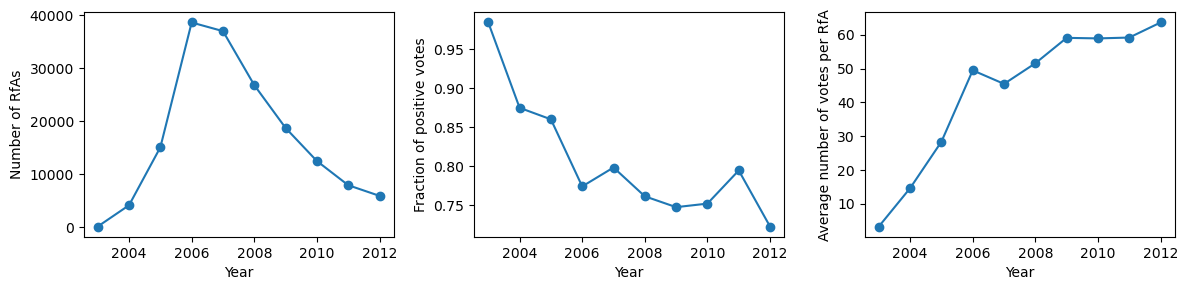

In [6]:
# 1.2
year = sorted(df.YEA.unique())

num_rfa_per_year = df.groupby("YEA").agg(count=("YEA", "size")).sort_values("YEA")

frac_pos_per_year = df.groupby(["YEA", "VOT"]).agg(frac=("VOT", "size")) / df.groupby("YEA").agg(frac=("YEA", "size"))
frac_pos_per_year = frac_pos_per_year.reset_index().set_index("YEA")
frac_pos_per_year = frac_pos_per_year.loc[frac_pos_per_year["VOT"] == 1].drop(columns=["VOT"])

avg_num_vot_per_year = df.groupby(["YEA", "TGT"]).agg(count=("TGT", "size")).groupby("YEA").mean()

print("Number of RfAs in year 2008: %.0f" % num_rfa_per_year.loc[2008])
print("Fraction of positive votes in year 2008: %.2f" % frac_pos_per_year.loc[2008])
print("Average number of votes per RfA in year 2008: %.2f \n" % avg_num_vot_per_year.loc[2008])

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].plot(year, num_rfa_per_year, '-o')
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of RfAs")

axs[1].plot(year, frac_pos_per_year, '-o')
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Fraction of positive votes")

axs[2].plot(year, avg_num_vot_per_year, '-o')
axs[2].set_xlabel("Year")
axs[2].set_ylabel("Average number of votes per RfA")

plt.tight_layout()
plt.show()

**1.3** 
**/Discuss:/** Describe the temporal patterns observed in the plots you did in **T1.2**.

**A1.3** 
*YOUR ANSWER HERE*

* Number of RfAs per year rapidly increases during 2003-2006, peaks at year 2006-2007, and quickly drops until year 2012.
* Fraction of positive votes shows fluctuated decrease throughout the time period 2003-2012.
* Average number of votes per year steadily increases throughout the time period 2003-2012.

**1.4** 
Create an undirected graph ([`nx.Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html)) where every node corresponds to a Wikipedia user (source or target of an RfA) and where there exists an edge between two users if at least one of them has voted on the other. Each edge should have attributes corresponding to columns of the dataframe, namely:
- `VOT`, which equals `1` if the vote was positive, and `-1` otherwise.
- `YEA`, an integer that represents the year of the RfA.

**The code to load the graph has been provided to you!** After running it, print the number of nodes and edges in your graph.

---

**Observation:** Note that we have at most one edge per pair of nodes in the graph, even though two votes may be associated with the pair  — e.g., if A voted in B's RfA in time $t_1$ and B voted in A's RfA in time $t_2$ ($t_1 < t_2$). In these cases, the code provided associates the metadata of the oldest vote ($t_1$ in the example) to the edge between A and B.

In [8]:
# Provided code! Do not change!
import networkx as nx
import pandas as pd
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

In [9]:
# 1.4
print("Number of nodes: %.0f" % G.number_of_nodes())
print("Number of edges: %.0f" % G.number_of_edges())

Number of nodes: 10831
Number of edges: 161147


**1.5** 
Plot the **complementary** cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

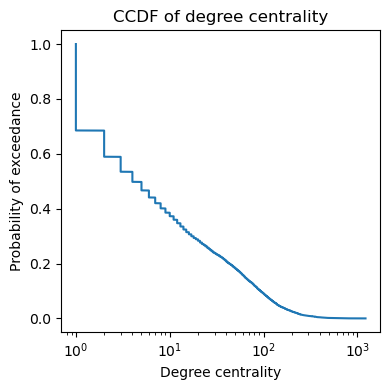

In [10]:
# 1.5
degrees = dict(G.degree(G.nodes()))
sorted_degree = sorted(degrees.values())
prob = np.arange(len(degrees), 0, -1) / len(degrees)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.semilogx(sorted_degree, prob)
ax.set_xlabel("Degree centrality")
ax.set_ylabel("Probability of exceedance")
ax.set_title("CCDF of degree centrality")
plt.tight_layout()
plt.show()


**1.6**
**/Discuss:/** Why is the following statement false? Justify your answer. **"From the graph obtained in task 1.5, one can conclude that around 40% of the users voted at least 11 times."**


**A1.6**
*YOUR ANSWER HERE*

The degree centrality indicates the number of edges connected to each node. It does not indicate the direction of the edge, i.e., whether the user is voting or being voted. <font color='red'> Therefore, 40% is an upper bound.</font>

**1.7**
What fraction of users voted at least 11 times? Use the data to measure the fraction.

In [11]:
# 1.7
'''The answer below does not include all users involved in voting in the denominator'''
frac_above_11 = sum(df.groupby("SRC").size() >= 11) / len(df.SRC.unique())
print("Fraction of users voted at least 11 times: %.2f" % frac_above_11)

'''Correction'''
G_ = nx.from_pandas_edgelist(df, source='SRC', target='TGT', create_using=nx.MultiDiGraph)
tmp = dict(G_.out_degree()).values()
frac_above_11 = sum(1 for t in tmp if t > 11) / len(tmp)
print("Fraction of users voted at least 11 times: %.2f" % frac_above_11)

Fraction of users voted at least 11 times: 0.27
Fraction of users voted at least 11 times: 0.24


### Task 2: Triangles

Next, you set out to investigate the social balance theory by looking at the RfA graph.

**2.1**
Considering _only_ the RfAs of 2004 (i.e., where `YEA == 2004`), generate all triangles in the undirected graph.
Print the number of triangles found.
- **Hint:** Note that you can generate a graph with only a subset of nodes and edges via ` G.edge_subgraph`.
-  **Hint:** The function `nx.enumerate_all_cliques` generates all cliques in an undirected graph. First, all cliques of size 1 are generated, then all cliques of size 2, etc. Triangles are cliques of size 3.


In [21]:
# 2.1
'''Should use (SRC, TGT) pair with YEA == 2004 for creating the subgraph'''
def calc_triangles(G):
    cliques = nx.enumerate_all_cliques(G)
    
    triangles = []
    for c in cliques:
        if len(c) == 3:
            triangles.append(c)
        elif len(c) > 3:
            break
        else:
            pass
    return triangles


rfa_2004 = [(src, tgt) for i, (src, tgt) in df.loc[df.YEA == 2004, ["SRC", "TGT"]].iterrows()]
G_sub = G.edge_subgraph(rfa_2004)
triangles = calc_triangles(G_sub)

print("Number of cliques with size 3: %.0f" % len(triangles))

Number of cliques with size 3: 8448


**2.2 ** **/True or false:/** Is the following statement true or false? Justify your answer. **"The node with the highest clustering coefficient in an undirected graph is the node that belongs to the largest number of triangles."**

**A2.2**
*YOUR ANSWER HERE*

False. Clustering coefficient is the highest when all neighbors of the ndoe are connected to each other. The node can belong to a single triangle where the other two nodes are connected, and reach the highest clustering coefficient of 1.

**2.3** Considering the set of triangles previously calculated, estimate the fraction of triangles of configurations
 $\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, and $\{+,-,-\}$. What fraction of triangles are "balanced" according to structural balance theory?

In [27]:
# 2.3
from collections import defaultdict

def classify_triangles(G, triangles, name):
    counter = defaultdict(list)

    for tri in triangles:
        G_tri = G.subgraph(tri)
        vot_tri = nx.get_edge_attributes(G_tri, name)

        num_pos = sum(1 for vot in vot_tri.values() if vot == 1)
        if num_pos == 3:
            counter['three_pos'].append(tri)
        elif num_pos == 2:
            counter['two_pos'].append(tri)
        elif num_pos == 1:
            counter['one_pos'].append(tri)
        else:
            counter['zero_pos'].append(tri)
    return counter


def print_triangle_stats(counter):
    tot = sum(len(v) for v in counter.values())
    frac_balanced = (len(counter['three_pos']) + len(counter['one_pos'])) / tot
        
    print("Fraction of [+, +, +]: %.3f" % (len(counter['three_pos']) / tot))
    print("Fraction of [-, -, -]: %.3f" % (len(counter['zero_pos']) / tot))
    print("Fraction of [+, +, -]: %.3f" % (len(counter['two_pos']) / tot))
    print("Fraction of [+, -, -]: %.3f" % (len(counter['one_pos']) / tot))
    print("Fraction of balanced triangles: %.3f" % frac_balanced)
    

counter = classify_triangles(G, triangles, "VOT")
print_triangle_stats(counter)

Fraction of [+, +, +]: 0.793
Fraction of [-, -, -]: 0.005
Fraction of [+, +, -]: 0.139
Fraction of [+, -, -]: 0.063
Fraction of balanced triangles: 0.855


**2.4** To observe how triangle configurations would be distributed under a random null model, do the following:
- Create a new column `VOT_RND` in the dataframe, where RfA votes (i.e., edge signs in the graph) are shuffled, i.e., permuted randomly.  For shuffling, use `numpy.random`, without replacement and with the seed 32 (see code provided below).
- Create a new edge attribute with the values of `VOT_RND` in the graph you created in task **1.4**. You can do this easily using the  [`set_edge_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html) function.
- Considering the shuffled edge signs,  compute the fraction of triangles in each configuration ($\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, $\{+,-,-\}$). Moreover, compute the fraction of triangles that are "balanced" according to structural balance theory. (Reminder: consider only the RfAs of 2004.)


In [28]:
# PROVIDED STUB FOR 2.4
import numpy as np
np.random.seed(32)
df_2004 = df[df.YEA == 2004].copy(deep=True)
df_2004["VOT_RND"] = np.random.choice(df_2004["VOT"].values, size=len(df_2004), replace=False)

In [29]:
# 2.4
vot_rnd_2004 = {(src, tgt): vot for i, (src, tgt, vot) in df_2004[["SRC", "TGT", "VOT_RND"]].iterrows()}
nx.set_edge_attributes(G, vot_rnd_2004, name="VOT_RND")

counter = classify_triangles(G, triangles, "VOT_RND")
print_triangle_stats(counter)

Fraction of [+, +, +]: 0.686
Fraction of [-, -, -]: 0.002
Fraction of [+, +, -]: 0.278
Fraction of [+, -, -]: 0.034
Fraction of balanced triangles: 0.720


**2.5** **/Discuss:/** Do the results of tasks **2.3** and **2.4** suggest that structural balance theory is correct? What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) Justify your answer.

**A2.5** *YOUR ANSWER HERE*

The results of tasks **2.3** and **2.4** <font color='red'> show that the observed fraction of balanced triangles is higher than that in a random null model, therefore imply that the structural balance theory is correct. </font>We can use bootstrapping to calculate the confidence interval of the fraction of balanced triangles, with the observation and the random null model, respectively. If the confidence interval do not overlap, then it implies that the difference between the results cannot be attributed to chance, and that the structural theory is true.

### Interlude: Additional data

In the data provided in the file `wiki-RfA.csv.gz` (with which you’ve worked up to now), each column corresponds to a vote from a user $u$ to a user $v$ at a time $t$. 

In **Task 2**, we did not consider the temporal aspect of this network. For the next task, you are provided with a complimentary dataset (`data/wiki-RfA_extra.csv.gz`) containing, for each vote (uniquely determined by `SRC` and `TGT`), a variety of features. **Importantly, these features were calculated considering only data that was already available at the time when the respective vote was cast.** The features are described as follows.

- `PP`, `NN`, `PN` — Each vote (signed edge) is part of zero or more triangles, and we computed the number of triangles in which the two remaining edges were both positive (`PP`), both negative (`NN`) and of different signs (i.e., one positive and one negative, `PN`). This considers only the votes the target (denoted by `TGT`) has received before the current vote. 

- `P`, `N` — The number of positive (`P`) and negative (`N`) votes that the target `TGT` received before the current vote.

- `TXT_PROCESSED` — The text in the original dataset, processed so 1) it is entirely lower-case, 2) it does not contain non-alphanumeric characters, and 3) it does not contain words starting with “supp” or “opp” (since words such as "support" and "oppose"  are obvious give-away signals of the vote).

### Interlude: Predicting edge signs with structural balance theory

We can use structural balance theory to predict edge signs. 

Consider an edge whose sign we do not know, as well as the fractions `PP`, `NN`, and `PN` associated with the edge, as defined above. 

According to structural balance theory, if `PP` + `NN` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

According to the weak structural balance theory, if `PP` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

Note that in both cases we use “$\geq$” rather than “<”, i.e., when both sides of the equation are equal, we break ties in favor of positive edges. We do so because there are more positive edges in the graph.

### Task 3: Predict it!

In the final part of the exam, you will leverage your machine learning and regression skills.

**3.1** Merge the new dataset with the original dataframe from task **1** using the columns `SRC` and `TGT`. You may drop the old `TXT` column if you want to. 


In [41]:
# 3.1
df_extra = pd.read_csv("wiki-RfA_extra.csv.gz")
df_merged = df.merge(df_extra, on=["SRC", "TGT"]).drop(columns=["TXT"])
df_merged.head()

,SRC,TGT,VOT,RES,YEA_x,DAT,YEA_y,PP,NN,PN,N,P,TXT_PROCESSED
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,2012,2,0,4,12,0,
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,2012,2,1,3,11,0,this joke really isn t funny not even if you ...
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,2012,0,0,2,10,0,as per nomination and answers
3,3750,9966,-1,-1,2012,2012-12-30 22:14:00,2012,0,0,0,9,0,and speeedy close this as wp snow as it s cle...
4,4225,9966,-1,-1,2012,2012-12-30 22:08:00,2012,0,0,1,8,0,per nomination and answers i am particularly ...


**3.2**  Create the following two rule-based classifiers, and for each, estimate its area under the ROC curve (a.k.a. “AUC/ROC”) on the entire dataset:

- **A)** a classifier inspired by structural balance theory. The classifier should predict a positive vote if  `PP` + `NN` $\geq$ `PN`, and a negative vote otherwise.
- **B)** a classifier inspired by weak structural balance theory. The classifier should predict a positive vote if `PP`  $\geq$ `PN` and a negative vote otherwise.

In [42]:
# 3.2
from sklearn.metrics import roc_auc_score

def structural_balance_classifier(df):
    if df["PP"] + df["NN"] >= df["PN"]:
        return 1
    else:
        return -1

def weak_structural_balance_classifier(df):
    if df["PP"] >= df["PN"]:
        return 1
    else:
        return -1
    
def predict_vote(df):
    df["PRED_SB"] = df.apply(structural_balance_classifier, axis=1)
    df["PRED_WSB"] = df.apply(weak_structural_balance_classifier, axis=1)
    return df


df_merged = predict_vote(df_merged)

print("AUC/ROC for structural balance classifier: %.3f" % roc_auc_score(df_merged["VOT"], df_merged["PRED_SB"]))
print("AUC/ROC for weak structural balance classifier: %.3f" % roc_auc_score(df_merged["VOT"], df_merged["PRED_WSB"]))

AUC/ROC for structural balance classifier: 0.525
AUC/ROC for weak structural balance classifier: 0.528


**3.3** To determine if the differences in the classifiers from task **3.2** occur solely due to chance, follow the following bootstrap procedure, using 200 iterations:

- **A)** Randomly sample the entire dataset (i.e., votes from the dataframe constructed in task **3.1**) with replacement;
- **B)** Compute the difference of the AUC/ROC for the two classifiers on the entire dataset.

Then use the distribution of AUC/ROC differences (one difference per bootstrap iteration) to estimate the 95% confidence interval for the AUC/ROC difference.

In [46]:
# 3.3
def calc_roc_auc_diff(df):
    return roc_auc_score(df["VOT"], df["PRED_SB"]) - roc_auc_score(df["VOT"], df["PRED_WSB"])

def bootstrap_CI(df, size, num_iter, alpha=0.05):
    mean = np.zeros(num_iter)
    for i in range(num_iter):
        df_sampled = df.sample(n=size, replace=True)
        df_sampled = predict_vote(df_sampled)
        mean[i] = calc_roc_auc_diff(df_sampled)
    CI = (np.quantile(mean, alpha/2), np.quantile(mean, 1-alpha/2))
    return CI


CI = bootstrap_CI(df_merged, size=len(df_merged), num_iter=200, alpha=0.05)
print("95% confidence interval for AUC/ROC difference: [{:.2e}, {:.2e}]".format(CI[0], CI[1]))

95% confidence interval for AUC/ROC difference: [-3.08e-03, -2.28e-03]


**3.4** **/Discuss:**/ According to the results in tasks **3.2** and **3.3**, which theory better predicts actual edge signs, structural balance theory or the weak structural balance theory? 


**A3.4** *YOUR ANSWER HERE*

There is no significant difference in the prediction performance of the two theories at 95% confidence level.

<font color='red'> Weak structural balance theory outperforms structural balance theory at 95% confidence level. </font>

**3.5** How accurately can we predict the vote with more sophisticated features and algorithms?

- Create a TF-IDF representation of the text of each vote  using `sklearn`'s vectorizer ([`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) with the parameters `max_features=150` and `stop_words='english'`.
- Split the  dataset into training and test sets using sklearn [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) using parameters `test_size=0.1` and  `random_state=42`.

- Then, train two logistic regression models ([`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)) using parameters `loss='log_loss'` and `max_iter=2000` considering:

    - **1)** the TF-IDF feature vector

    - **2)** the TF-IDF feature vector and the features `PP`, `NN`, `PN`, `P`, and `N` related to the graph.

- Last, report the AUC/ROC of each model in the test set.

In [44]:
# 3.5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier


def fit_model(X, y):
    model = SGDClassifier(random_state=0, loss='log_loss', max_iter=2000)
    model.fit(X, y)
    return model
    
def standardize(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

'''Never use fit_transform() on testing data'''
def get_tfidf(trainset, testset):
    vectorizer = TfidfVectorizer(max_features=150, stop_words='english')
    train_tfidf = vectorizer.fit_transform(trainset["TXT_PROCESSED"])
    test_tfidf = vectorizer.transform(testset["TXT_PROCESSED"])
    return train_tfidf.toarray(), test_tfidf.toarray()


# drop NaN text
features = ["PP", "NN", "PN", "P", "N"]
df_merged = df_merged.dropna(subset = features + ["TXT_PROCESSED"])

# standardize features
# df_merged = standardize(df_merged, features)

# get train-test split
trainset, testset = train_test_split(df_merged, test_size=0.1, random_state=42)
train_tfidf, test_tfidf = get_tfidf(trainset, testset)
train_y, test_y = trainset["VOT"].tolist(), testset["VOT"].tolist()

# A: TF-IDF feature vector
train_X = train_tfidf
model = fit_model(train_X, train_y)
test_pred = model.predict(test_tfidf)
print("AUC/ROC for model A: %.2f" % roc_auc_score(test_y, test_pred))

# B: TF-IDF feature vector and features PP, NN, PN, P, and N
train_X = np.column_stack([train_tfidf, trainset[features].to_numpy()])
test_X = np.column_stack([test_tfidf, testset[features].to_numpy()])
model = fit_model(train_X, train_y)
test_pred = model.predict(test_X)
print("AUC/ROC for model B: %.2f" % roc_auc_score(test_y, test_pred))

AUC/ROC for model A: 0.70
AUC/ROC for model B: 0.77


**3.6** **/Discuss:**/  According to the results in task **3.5**, does information from the graph help in the task of predicting the vote even when using the text?  What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) 

**A3.6** *YOUR ANSWER HERE*

It appears that the information from the graph helps predict the vote. <font color='red'>Bootstrap the difference in AUC/ROC score between the models.</font>

**3.7** Putting on your observational studies hat, run two logistic regressions using `statsmodels`.
- In the first regression, the vote is the outcome, and `PP`, `NN` and `PN` are the predictors.
- In the second regression, the vote is the outcome, and `PP`, `NN`, `PN`, and `N` are the predictors.

In [49]:
# 3.7
import statsmodels.api as sm
import statsmodels.formula.api as smf

'''Assign VOT to 0 and 1 for better interpretability'''
df_merged["VOT2"] = (df_merged["VOT"] == 1).values.astype(int)

mod_1 = smf.logit(formula="VOT2 ~ PP + NN + PN", data=df_merged).fit()
print(mod_1.summary())

mod_2 = smf.logit(formula="VOT2 ~ PP + NN + PN + N", data=df_merged).fit()
print(mod_2.summary())

Optimization terminated successfully.
         Current function value: 0.520376
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   VOT2   No. Observations:               162920
Model:                          Logit   Df Residuals:                   162916
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:                 0.01775
Time:                        20:56:49   Log-Likelihood:                -84780.
converged:                       True   LL-Null:                       -86312.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2520      0.006    201.118      0.000       1.240       1.264
PP             0.2462      0.

**3.8** **/Discuss:**/   Explain what the coefficient associated with `PP` means in the first regression. Is it in accordance with structural balance theory?

**A3.8** *YOUR ANSWER HERE*

The coefficient associated with `PP` is 0.0866. It indicates that a unit increase in `PP` increases the probability of positive vote by 0.0866. This is in accordance with structural balance theory because [+, +, +] is considered balanced, while [+, +, -] is not.

<font color='red'> Having two other positive edges increases the log odds of receiving a positive vote by 0.25.</font>

**3.9** **/Discuss:**/   Compare the coefficients associated with `PN` and `NN` in the first vs. the second regression. Present a reason that may explain this difference.

**A3.9**  *YOUR ANSWER HERE*

The coefficients associated with `PN` and `NN` both increase in the second regression. This may be due to a positive correlation between these two variables with `N`, which is negatively correlated with the dependent variable `VOT`.

---